## Problem - Customer Churn

We work for a fictitious telecommunications company 

One of the most important goals of the company is to increase customer loyalty. 

One strategy to achieve this goal is to identify customers who are likely to churn and approach them before they leave.

To do this, we'll look at historical customer data and see if we can develop a model that predicts churn based on various customer factors such as contract length, monthly payments, demographic information, etc.

This model would then help us to identify customers with a high risk of churn early enough so marketing could still address them e.g. with promotional packages.

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Get Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Filter only monthly contracts

In [4]:
df = df.query("Contract == 'Month-to-month'")

## Basic EDA

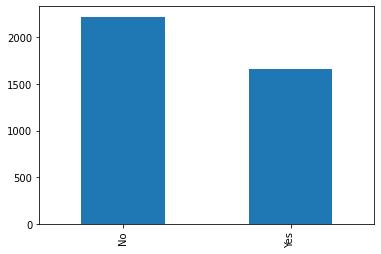

In [5]:
df['Churn'].value_counts().plot(kind="bar")

### Inspect MonthlyCharges

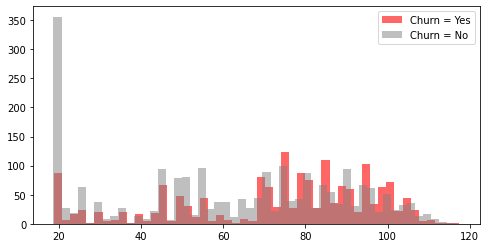

In [6]:
plt.figure(figsize=(8, 4))
plt.hist(df.query("Churn == 'Yes'")['MonthlyCharges'], 50, alpha=0.6, color = "red", label='Churn = Yes')
plt.hist(df.query("Churn == 'No'")['MonthlyCharges'], 50, alpha=0.5, color = "grey", label='Churn = No')
plt.legend(loc='upper right')
plt.show()

## Inspect Tenture

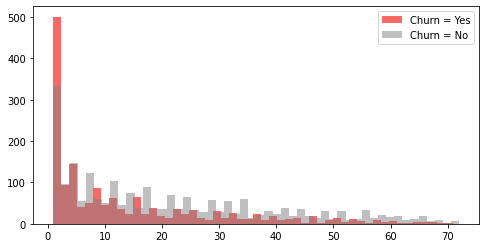

In [7]:
plt.figure(figsize=(8, 4))
plt.hist(df.query("Churn == 'Yes'")['tenure'], 50, alpha=0.6, color = "red", label='Churn = Yes')
plt.hist(df.query("Churn == 'No'")['tenure'], 50, alpha=0.5, color = "grey", label='Churn = No')
plt.legend(loc='upper right')
plt.show()

### Inspect Partner

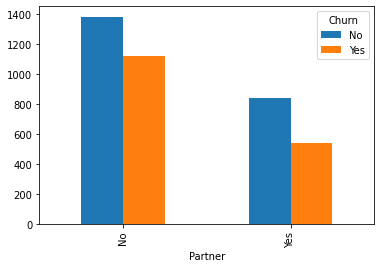

In [8]:
pd.crosstab(df['Partner'], df['Churn']).plot(kind="bar")

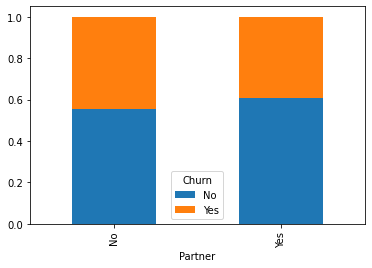

In [9]:
pd.crosstab(df['Partner'], df['Churn'], normalize = "index").plot(kind="bar", stacked = True)

### Inspect Senior Citizen

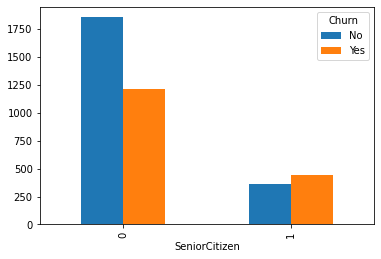

In [10]:
pd.crosstab(df['SeniorCitizen'], df['Churn']).plot(kind="bar")

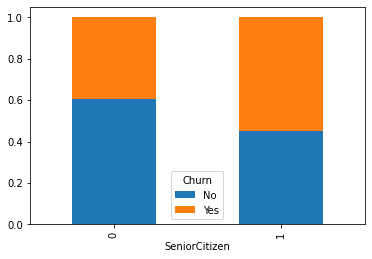

In [11]:
pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize = "index").plot(kind="bar", stacked = True)

## Modeling

### Create feature matrix X

Select features

In [12]:
X = df.loc[:,['MonthlyCharges', 'tenure', 'Partner', 'SeniorCitizen']]

Add constant

In [13]:
X = sm.add_constant(X); # Add constant to estimte intercept parameter

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
X

,const,MonthlyCharges,tenure,Partner,SeniorCitizen
0,1.0,29.85,1,Yes,0
2,1.0,53.85,2,No,0
4,1.0,70.70,2,No,0
5,1.0,99.65,8,No,0
6,1.0,89.10,22,No,0
...,...,...,...,...,...
7033,1.0,69.50,38,No,0
7034,1.0,102.95,67,No,0
7035,1.0,78.70,19,No,0
7040,1.0,29.60,11,Yes,0


Convert Yes to 1 and No to 0

In [15]:
X['Partner'] = X['Partner'].map(dict(Yes=1, No=0))
X

,const,MonthlyCharges,tenure,Partner,SeniorCitizen
0,1.0,29.85,1,1,0
2,1.0,53.85,2,0,0
4,1.0,70.70,2,0,0
5,1.0,99.65,8,0,0
6,1.0,89.10,22,0,0
...,...,...,...,...,...
7033,1.0,69.50,38,0,0
7034,1.0,102.95,67,0,0
7035,1.0,78.70,19,0,0
7040,1.0,29.60,11,1,0


### Create target vector y

In [16]:
y = df['Churn']

In [17]:
y.value_counts()

No     2220
Yes    1655
Name: Churn, dtype: int64

In [18]:
y = y.map(dict(Yes=1, No=0))

In [19]:
y.value_counts()

0    2220
1    1655
Name: Churn, dtype: int64

### Fit Model

In [20]:
model = sm.Logit(y, X)

In [21]:
res = model.fit()

Optimization terminated successfully.
         Current function value: 0.606712
         Iterations 5


In [22]:
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 3875
Model:                          Logit   Df Residuals:                     3870
Method:                           MLE   Df Model:                            4
Date:                Thu, 24 Nov 2022   Pseudo R-squ.:                  0.1110
Time:                        14:20:04   Log-Likelihood:                -2351.0
converged:                       True   LL-Null:                       -2644.6
Covariance Type:            nonrobust   LLR p-value:                9.152e-126
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.4356      0.100    -14.359      0.000      -1.632      -1.240
MonthlyCharges     0.0265      0.002     17.281      0.000       0.023       0.029
tenure            -0.0431      0.002

## Use Model

Predict probabilities for class `churn`:



In [23]:
res.predict(X)

0       0.325235
2       0.475677
4       0.586221
5       0.701700
6       0.493134
          ...   
7033    0.225133
7034    0.167721
7035    0.456809
7040    0.237268
7041    0.706326
Length: 3875, dtype: float64

Get class based on decision threshold `0.5`:

In [24]:
y_hat = (res.predict(X) >= 0.5).astype(int)

In [25]:
y_hat

0       0
2       0
4       1
5       1
6       0
       ..
7033    0
7034    0
7035    0
7040    0
7041    1
Length: 3875, dtype: int64

### Get Data

In [26]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv")
df = df.query("Contract == 'Month-to-month'")

## Training-Testing Split

In [27]:
from sklearn.model_selection import train_test_split

# Define X and y
X = df.loc[:,['MonthlyCharges', 'tenure', 'SeniorCitizen']]
y = df['Churn']
y = y.map(dict(Yes=1, No=0))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify = y)

In [28]:
print(len(X_train), len(X_test))

3100 775


Inspect distribution of target in training and test set

In [29]:
print(pd.Series(y_train).value_counts(normalize = True))
print(pd.Series(y_test).value_counts(normalize = True))

0    0.572903
1    0.427097
Name: Churn, dtype: float64
0    0.572903
1    0.427097
Name: Churn, dtype: float64


### Model training with sklearn

In [30]:
# Define Model
from sklearn import linear_model
model = linear_model.LogisticRegression(fit_intercept = True)

# Train Model
model.fit(X_train, y_train)

# Show model
print(model.coef_)

# Model Performance (Accuracy)
print(model.score(X_train, y_train))

[[ 0.02558182 -0.0420351   0.63308752]]
0.675483870967742


In [31]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_train)
f1_score(y_pred, y_train)

0.5963081861958266

Evaluate on test set? Not so fast...

## Training with Cross-Validation 
### Implement CV (almost) from scratch with sklearn

In [32]:
from sklearn import model_selection
# Set parameter k
k = 5

# Concat X_train and y_train
kfold_df = X_train.copy()
kfold_df['target'] = y_train

# Shuffle the rows of the data frame
kfold_df = kfold_df.sample(frac=1, replace=False, random_state=123).reset_index(drop = True)
kfold_df['kfold'] = ""

# Initiate KFold class from scikit-learn
kf = model_selection.KFold(n_splits=k)

# Populate the kfold column
for fold, (train, validation) in enumerate(kf.split(X=kfold_df)):
 kfold_df.loc[validation, 'kfold'] = fold

# Inspect training data frame
kfold_df

,MonthlyCharges,tenure,SeniorCitizen,target,kfold
0,30.35,23,0,0,0
1,74.45,1,1,1,0
2,75.60,23,0,1,0
3,79.10,3,0,1,0
4,70.05,9,0,0,0
...,...,...,...,...,...
3095,19.65,1,0,1,4
3096,73.75,4,0,1,4
3097,64.10,40,0,0,4
3098,94.20,8,0,1,4


Cross validation training loop

In [33]:
# Train Model with Cross-Validation
mean_f1 = []

model = linear_model.LogisticRegression(fit_intercept = True)

for fold in range(0,k):

  # Training data is all but the provided fold
  fold_df = kfold_df[kfold_df['kfold'] != fold].reset_index(drop = True)

  # Validation fold is the fold provided
  valid_df = kfold_df[kfold_df['kfold'] == fold].reset_index(drop = True)

  # Assign feature & target columns
  X_train_cv = fold_df.drop("target", axis = 1)
  y_train_cv = fold_df['target']

  # Same for validation set
  X_valid_cv = valid_df.drop("target", axis = 1)
  y_valid_cv = valid_df['target']

  # Fit the model on training data
  model.fit(X_train_cv, y_train_cv)

  # Get predictions for validation samples
  predictions = model.predict(X_valid_cv)

  # Evaluate model
  f1 = f1_score(y_valid_cv, predictions)
  print(f"Fold = {fold}, F1 = {f1}")

  mean_f1.append(f1)

print(f"Average model F1-Score is {np.mean(mean_f1)}")

Fold = 0, F1 = 0.5756302521008403
Fold = 1, F1 = 0.588957055214724
Fold = 2, F1 = 0.58
Fold = 3, F1 = 0.6457925636007827
Fold = 4, F1 = 0.5692007797270955
Average model F1-Score is 0.5919161301286884


Great - we have validated our model accuracy using cross validation! Let's try different models / hyperparameters.

## Grid Search with CV

Hyperparameter tuning

In [34]:
from sklearn.model_selection import GridSearchCV

model = linear_model.LogisticRegression(fit_intercept = True, max_iter = 1000)

# Define grid
parameters = {'class_weight': [None, 'balanced'], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid_search = GridSearchCV(model, parameters, cv = k, scoring = "f1")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'class_weight': [None, 'balanced'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [35]:
pd.DataFrame((grid_search.cv_results_)).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.274962,0.035227,0.004926,0.000251,balanced,saga,"{'class_weight': 'balanced', 'solver': 'saga'}",0.596187,0.612389,0.605634,0.636364,0.636678,0.617450,0.016400,1
8,0.169861,0.030058,0.005564,0.000962,balanced,sag,"{'class_weight': 'balanced', 'solver': 'sag'}",0.596187,0.612389,0.604240,0.637478,0.636678,0.617395,0.016870,2
7,0.012962,0.004088,0.009282,0.007460,balanced,liblinear,"{'class_weight': 'balanced', 'solver': 'liblin...",0.596187,0.612389,0.604240,0.636364,0.636678,0.617172,0.016609,3
5,0.050112,0.012460,0.004895,0.000307,balanced,newton-cg,"{'class_weight': 'balanced', 'solver': 'newton...",0.596187,0.609929,0.602837,0.637478,0.635417,0.616370,0.016972,4
6,0.051792,0.009262,0.012824,0.005463,balanced,lbfgs,"{'class_weight': 'balanced', 'solver': 'lbfgs'}",0.596187,0.609929,0.602837,0.637478,0.635417,0.616370,0.016972,4
0,0.033753,0.010227,0.003469,0.000727,None,newton-cg,"{'class_weight': None, 'solver': 'newton-cg'}",0.572565,0.572000,0.592000,0.631365,0.605210,0.594628,0.022214,6
1,0.021236,0.003783,0.003223,0.000288,None,lbfgs,"{'class_weight': None, 'solver': 'lbfgs'}",0.572565,0.572000,0.592000,0.631365,0.605210,0.594628,0.022214,6
2,0.006856,0.000251,0.003133,0.000114,None,liblinear,"{'class_weight': None, 'solver': 'liblinear'}",0.572565,0.570281,0.592000,0.631365,0.600000,0.593242,0.022160,8
3,0.112522,0.049129,0.004188,0.000801,None,sag,"{'class_weight': None, 'solver': 'sag'}",0.572565,0.570281,0.592000,0.631365,0.600000,0.593242,0.022160,8
4,0.391160,0.059171,0.008805,0.004974,None,saga,"{'class_weight': None, 'solver': 'saga'}",0.572565,0.570281,0.592000,0.627291,0.600000,0.592427,0.020775,10


In [36]:
grid_search.best_estimator_

LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga')

In [37]:
# Train model on full training set with best estimator
best_model = grid_search.best_estimator_

# Fit the model on training data
best_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='saga')

Inspect Confusion Matrix

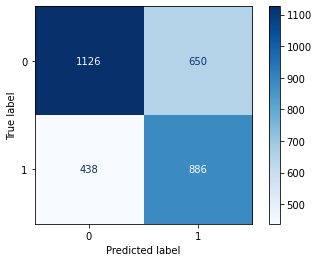

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = best_model.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = best_model.classes_)
plt = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model .classes_)
plt.plot(cmap = "Blues");

* **Top left**: Actual negative, negative positive = True Negatives
* **Top right**: Actual negative, predicted positive = False Positives
* **Bottom left**: Actual positive, predicted negative = False Negatives
* **Bottom right**: Actual positive, predicted positive = True Positives

## Feature Engineering

### Get Data

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv")
df = df.query("Contract == 'Month-to-month'")

In [40]:
# Define X and y
X = df.drop(['Churn'], axis = 1)
y = df['Churn']
y = y.map(dict(Yes=1, No=0))

# Stratified train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify= y )

In [41]:
print(pd.Series(y_train).value_counts(normalize = True))
print(pd.Series(y_test).value_counts(normalize = True))

0    0.572903
1    0.427097
Name: Churn, dtype: float64
0    0.572903
1    0.427097
Name: Churn, dtype: float64


In [42]:
X_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6028,1871-MOWRM,Male,0,Yes,No,12,Yes,No,Fiber optic,Yes,No,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),80.85,866.45
4645,5219-YIPTK,Female,0,Yes,No,33,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.40,3409.6
5958,6859-RKMZJ,Male,0,Yes,No,11,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),55.05,608.15
6031,0282-NVSJS,Female,1,Yes,Yes,12,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,29.30,355.9
459,1452-VOQCH,Male,0,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.10,75.1


Drop features we don't want to have:

* `customerID` does not generalize
* we don't want `gender` for ethical reasons
* `Contract` is only Month-to-month as per our definition

In [43]:
X_train = X_train.drop(['customerID', 'gender', 'Contract'], axis = 1)

Separate numeric from categorical columns

In [44]:
num_cols = X_train._get_numeric_data().columns
num_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

Encode `SeniorCitizen` as string

In [45]:
X_train['SeniorCitizen'] = X_train['SeniorCitizen'].astype(str)

Encode `TotalCharges` as numeric

In [46]:
X_train['TotalCharges'] = X_train['TotalCharges'].astype(float)

In [47]:
num_cols = X_train._get_numeric_data().columns
num_cols

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [48]:
cat_cols = X_train.drop(num_cols, axis = 1).columns
cat_cols

Index(['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

## Numeric columns: scaling

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30501f5090>,
      dtype=object)

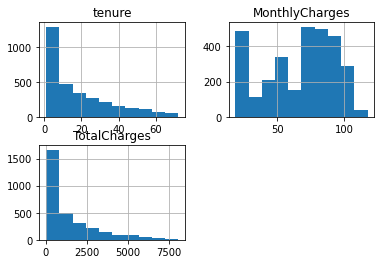

In [49]:
X_train[num_cols].hist()

Log-Transform tenure and Total Charges

In [50]:
from sklearn.preprocessing import power_transform

In [51]:
X_train[['tenure_power', 'TotalCharges_power']] = power_transform(X_train[['tenure', 'TotalCharges']], method='box-cox')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f305351da90>,
      dtype=object)

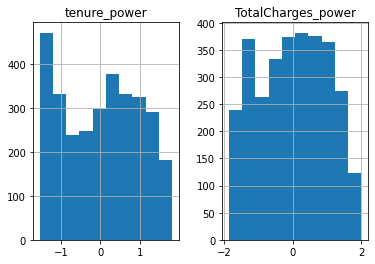

In [52]:
X_train[['tenure_power', 'TotalCharges_power']].hist()

Scale numeric features to the same scale:

In [53]:
def ab_scaler(x, a, b, max_x, min_x):
  return a + ((x - min_x)*(b-a)) / (max_x - min_x)

In [54]:
for column in ['tenure_power', 'TotalCharges_power', 'MonthlyCharges']:
  max = X_train[column].max()
  min = X_train[column].min()
  new_col = str(column + "_scaled")
  X_train[new_col] = X_train[column].apply(lambda x: ab_scaler(x =x, a=-1, b=1, max_x = max, min_x = min))

In [55]:
numeric_features = X_train.filter(regex='_scaled', axis=1).reset_index(drop = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3050126fd0>,
      dtype=object)

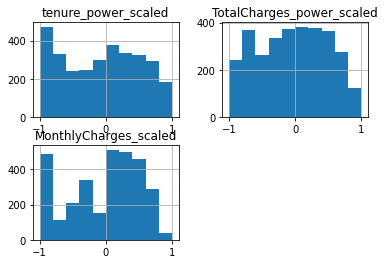

In [56]:
numeric_features.hist()

## Categorical Columns - Encoding

In [57]:
for column in cat_cols:
  print(X_train[column].value_counts())

0    2455
1     645
Name: SeniorCitizen, dtype: int64
No     1984
Yes    1116
Name: Partner, dtype: int64
No     2467
Yes     633
Name: Dependents, dtype: int64
Yes    2790
No      310
Name: PhoneService, dtype: int64
No                  1618
Yes                 1172
No phone service     310
Name: MultipleLines, dtype: int64
Fiber optic    1698
DSL             980
No              422
Name: InternetService, dtype: int64
No                     2102
Yes                     576
No internet service     422
Name: OnlineSecurity, dtype: int64
No                     1836
Yes                     842
No internet service     422
Name: OnlineBackup, dtype: int64
No                     1932
Yes                     746
No internet service     422
Name: DeviceProtection, dtype: int64
No                     2156
Yes                     522
No internet service     422
Name: TechSupport, dtype: int64
No                     1651
Yes                    1027
No internet service     422
Name: StreamingTV, d

Turn binary feature into numeric, and multi-class features into dummy variables

### Binary features

In [58]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [59]:
binary_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for column in binary_cols:
  new_col = str(column + "_be")
  X_train[new_col] = encoder.fit_transform(X_train[column])

In [60]:
binary_features = X_train.filter(regex='_be', axis=1).reset_index(drop = True)

In [61]:
binary_features.head()

,SeniorCitizen_be,Partner_be,Dependents_be,PhoneService_be,PaperlessBilling_be
0,0,1,0,1,0
1,0,1,0,1,1
2,0,1,0,1,1
3,1,1,1,0,1
4,0,0,0,1,1


### Multiclass features

In [62]:
multiclass_cols = list(set(cat_cols) - set(binary_cols))
multiclass_cols

['PaymentMethod',
 'MultipleLines',
 'StreamingTV',
 'OnlineBackup',
 'TechSupport',
 'OnlineSecurity',
 'StreamingMovies',
 'DeviceProtection',
 'InternetService']

In [63]:
categories = []

for column in multiclass_cols:
  categories.append(X_train[column].unique())

categories

[array(['Bank transfer (automatic)', 'Electronic check', 'Mailed check',
        'Credit card (automatic)'], dtype=object),
 array(['No', 'Yes', 'No phone service'], dtype=object),
 array(['No', 'Yes', 'No internet service'], dtype=object),
 array(['No', 'Yes', 'No internet service'], dtype=object),
 array(['Yes', 'No', 'No internet service'], dtype=object),
 array(['Yes', 'No', 'No internet service'], dtype=object),
 array(['No', 'Yes', 'No internet service'], dtype=object),
 array(['No', 'Yes', 'No internet service'], dtype=object),
 array(['Fiber optic', 'DSL', 'No'], dtype=object)]

In [64]:
from sklearn.preprocessing import OneHotEncoder

# specify categories explicitly to allow for same encoding during prediction
onehot_encoder = OneHotEncoder(sparse=False, categories = categories)

In [65]:
# Apply OneHotEncoder
multiclass_features = onehot_encoder.fit_transform(X_train[multiclass_cols])

In [66]:
multiclass_features = pd.DataFrame(multiclass_features, columns=onehot_encoder.get_feature_names_out())

In [67]:
multiclass_features.head()

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Credit card (automatic),MultipleLines_No,MultipleLines_Yes,MultipleLines_No phone service,StreamingTV_No,StreamingTV_Yes,StreamingTV_No internet service,...,OnlineSecurity_No internet service,StreamingMovies_No,StreamingMovies_Yes,StreamingMovies_No internet service,DeviceProtection_No,DeviceProtection_Yes,DeviceProtection_No internet service,InternetService_Fiber optic,InternetService_DSL,InternetService_No
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Build feature dataframe

In [68]:
X_train_fe = pd.concat([numeric_features, binary_features, multiclass_features], axis = 1)

In [69]:
X_train_fe.head()

,tenure_power_scaled,TotalCharges_power_scaled,MonthlyCharges_scaled,SeniorCitizen_be,Partner_be,Dependents_be,PhoneService_be,PaperlessBilling_be,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,...,OnlineSecurity_No internet service,StreamingMovies_No,StreamingMovies_Yes,StreamingMovies_No internet service,DeviceProtection_No,DeviceProtection_Yes,DeviceProtection_No internet service,InternetService_Fiber optic,InternetService_DSL,InternetService_No
0,-0.037704,0.066415,0.258359,0,1,0,1,0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.504461,0.605726,0.735562,0,1,0,1,1,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.079644,-0.057262,-0.264438,0,1,0,1,1,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.037704,-0.233416,-0.786221,1,1,1,0,1,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-1.000000,-0.677466,0.141844,0,0,0,1,1,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Feature selection

In [70]:
from sklearn.feature_selection import RFECV

model = linear_model.LogisticRegression()

selector = RFECV(
    estimator=model,
    min_features_to_select=3,
    scoring="f1",
    cv=5,
)

In [71]:
selector.fit(X_train_fe, y_train)

RFECV(cv=5, estimator=LogisticRegression(), min_features_to_select=3,
      scoring='f1')

`.support_` gives a boolean mask with False values for discarded features which we can use to filter the training dataframe

In [72]:
X_train_fe.columns[selector.support_]

Index(['tenure_power_scaled', 'TotalCharges_power_scaled', 'SeniorCitizen_be',
       'PaperlessBilling_be', 'PaymentMethod_Electronic check',
       'MultipleLines_No', 'StreamingTV_Yes',
       'OnlineBackup_No internet service', 'TechSupport_No',
       'TechSupport_No internet service', 'OnlineSecurity_No',
       'InternetService_Fiber optic', 'InternetService_DSL'],
      dtype='object')

In [73]:
len(X_train_fe.columns[selector.support_])

13

In [74]:
X_train_fe = X_train_fe.loc[:,selector.support_]
X_train_fe.head()

,tenure_power_scaled,TotalCharges_power_scaled,SeniorCitizen_be,PaperlessBilling_be,PaymentMethod_Electronic check,MultipleLines_No,StreamingTV_Yes,OnlineBackup_No internet service,TechSupport_No,TechSupport_No internet service,OnlineSecurity_No,InternetService_Fiber optic,InternetService_DSL
0,-0.037704,0.066415,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.504461,0.605726,0,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,-0.079644,-0.057262,0,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,-0.037704,-0.233416,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-1.000000,-0.677466,0,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


## Model training

In [75]:
from sklearn.model_selection import GridSearchCV

# Define grid
parameters = {'class_weight': [None, 'balanced'], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

model = linear_model.LogisticRegression(fit_intercept = True, max_iter = 1000)

grid_search = GridSearchCV(model, parameters, cv = k, scoring = "f1")
grid_search.fit(X_train_fe, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'class_weight': [None, 'balanced'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [76]:
pd.DataFrame((grid_search.cv_results_)).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.011341,0.000409,0.004914,0.000324,balanced,liblinear,"{'class_weight': 'balanced', 'solver': 'liblin...",0.646749,0.663102,0.677656,0.696915,0.660714,0.669027,0.017045,1
5,0.045943,0.004648,0.004618,0.000288,balanced,newton-cg,"{'class_weight': 'balanced', 'solver': 'newton...",0.649123,0.661922,0.673993,0.696915,0.660714,0.668533,0.016229,2
6,0.033448,0.003209,0.005488,0.001765,balanced,lbfgs,"{'class_weight': 'balanced', 'solver': 'lbfgs'}",0.649123,0.661922,0.673993,0.696915,0.660714,0.668533,0.016229,2
8,0.026163,0.004999,0.003391,0.000155,balanced,sag,"{'class_weight': 'balanced', 'solver': 'sag'}",0.649123,0.661922,0.673993,0.696915,0.660714,0.668533,0.016229,2
9,0.044173,0.001219,0.003378,0.000202,balanced,saga,"{'class_weight': 'balanced', 'solver': 'saga'}",0.649123,0.661922,0.673993,0.696915,0.660714,0.668533,0.016229,2


Train on all training data

In [77]:
best_model = grid_search.best_estimator_

# Train model on full training set
best_model.fit(X_train_fe, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

Plot feature importance

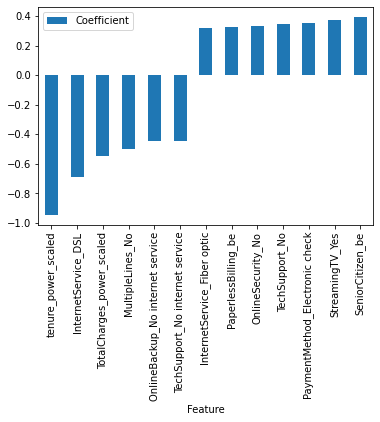

In [78]:
# Feature Importance
feature_importance_df = pd.DataFrame({"Feature": list(X_train_fe.columns), "Coefficient": best_model.coef_[0]})
feature_importance_df.sort_values("Coefficient").plot.bar(x = "Feature", y="Coefficient")

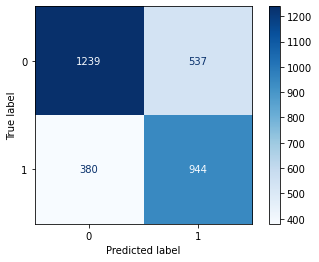

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = best_model.predict(X_train_fe)

cm = confusion_matrix(y_train, y_pred, labels = best_model.classes_)
plt = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model .classes_)
plt.plot(cmap = "Blues");

## Model evaluation

Inference pipeline

In [80]:
# Numeric features
X_test[['tenure_power', 'TotalCharges_power']] = power_transform(X_test[['tenure', 'TotalCharges']], method='box-cox')

for column in ['tenure_power', 'TotalCharges_power', 'MonthlyCharges']:
  max = X_train[column].max() # keep stats from training
  min = X_train[column].min() # keep stats from training
  new_col = str(column + "_scaled")
  X_test[new_col] = X_test[column].apply(lambda x: ab_scaler(x =x, a=-1, b=1, max_x = max, min_x = min))
  
numeric_features_test = X_test.filter(regex='_scaled', axis=1).reset_index(drop = True)
  
# Categorical features
for column in binary_cols:
  new_col = str(column + "_be")
  X_test[new_col] = encoder.fit_transform(X_test[column])
  
binary_features_test = X_test.filter(regex='_be', axis=1).reset_index(drop = True)

onehot_encoder = OneHotEncoder(sparse=False, categories = categories) # same categories as in training
multiclass_features_test = onehot_encoder.fit_transform(X_test[multiclass_cols])
multiclass_features_test = pd.DataFrame(multiclass_features_test, columns=onehot_encoder.get_feature_names_out())
X_test_fe = pd.concat([numeric_features_test, binary_features_test, multiclass_features_test], axis = 1)
X_test_fe = X_test_fe.loc[:,selector.support_]


### Evaluation

In [81]:
# Calculate F1-Score for test set
y_pred = best_model.predict(X_test_fe)
f1_score(y_test, y_pred)

0.6704545454545455